# 1. 필요한 라이브러리와 csv 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

# 2. 데이터 살피기 

In [3]:
df.shape

(395547, 8)

In [4]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.tail(3)

,article_id,start,end,answered,votes,category,title,content
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [6]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

'content' 열에 결측치가 1개 있다. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [8]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

In [9]:
df.columns 

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

In [10]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [11]:
df.describe(include=np.object)
# object 중 가장 많이 나오는 데이터를 보여줌
# count와 unique가 일치하지 않는 것은 도배글이 많다는 것을 의미함

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


데이터 타입이 object인 데이터에서 'title'과 'content'열은 count와 unique의 개수가 일치하지 않는다. 도배글이 많다는 것을 의미한다. 

# 3. 카테고리별 청원 수 시계열 그래프 그리기

In [12]:
df_copy = df[['start', 'category']]
df_copy['start_y_m'] = pd.Series([ i.strftime('%Y-%m') for i in df_copy['start'] ])
df_copy.head(2)

,start,category,start_y_m
0,2017-08-19,안전/환경,2017-08
1,2017-08-19,기타,2017-08


In [13]:
category_count_monthly = df_copy.groupby(['start_y_m', 'category']).size()
category_count_monthly = category_count_monthly.reset_index()
category_count_monthly.index = category_count_monthly['start_y_m']
category_count_monthly.drop('start_y_m', axis = 1, inplace = True)
category_count_monthly.columns = ['category', 'count']
category_count_monthly.head(5)

,category,count
start_y_m,,
2017-08,경제민주화,27
2017-08,교통/건축/국토,111
2017-08,기타,125
2017-08,농산어촌,13
2017-08,문화/예술/체육/언론,26


In [14]:
category_count_monthly_pivot =  category_count_monthly.pivot(columns="category", values="count").fillna(0)
category_count_monthly_pivot.head(5)

category,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
start_y_m,,,,,,,,,,,,,,,,,
2017-08,27,111,125,13,26,22,12,141,7,53,78,257,36,133,24,24,82
2017-09,142,458,2093,44,348,894,57,554,99,1984,814,2771,4394,511,238,992,675
2017-10,164,408,993,41,278,174,179,387,70,481,485,404,560,399,99,496,333
2017-11,352,738,3857,82,379,907,261,2328,123,2712,733,2088,2538,650,153,10503,1069
2017-12,563,1218,2368,106,728,668,196,1613,229,1639,1036,1833,1353,1156,242,2209,1299


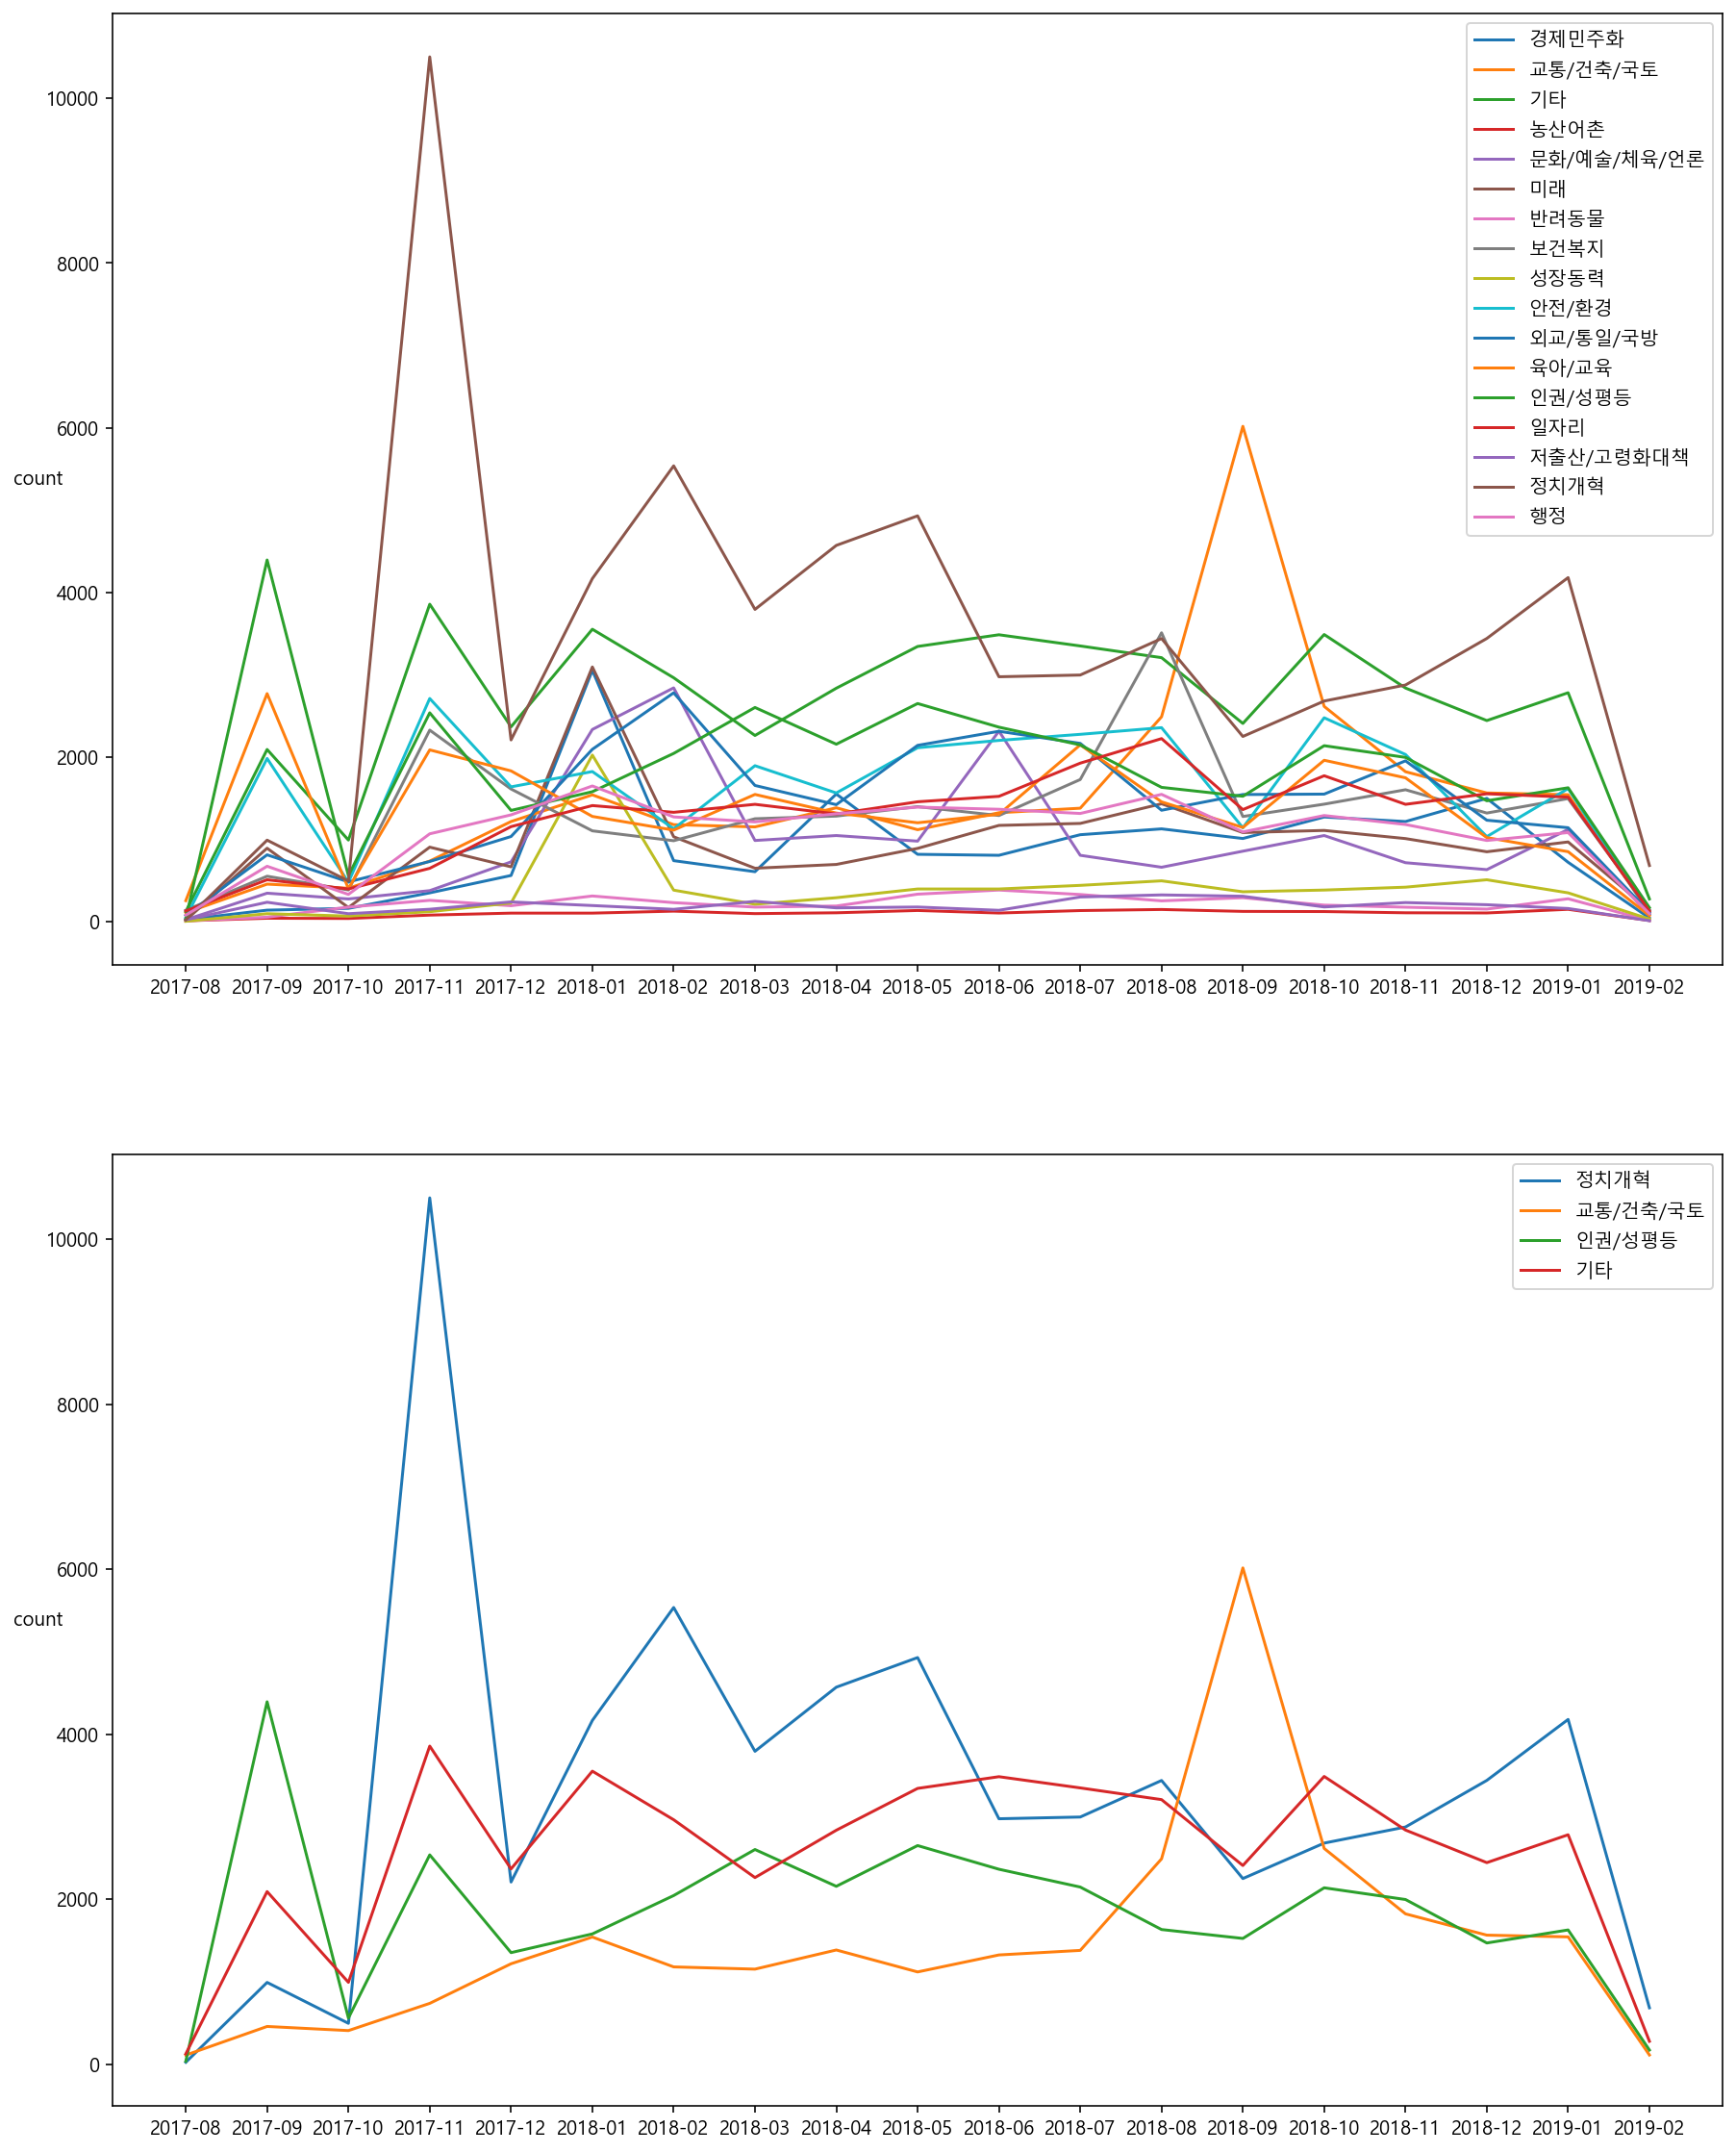

In [15]:
plt.rcParams["font.family"] = 'Malgun Gothic' # gulim

fig, axes = plt.subplots(nrows = 2, figsize = (15,20))

plt.sca(axes[0])
for category in category_count_monthly_pivot.columns:
    plt.plot(category_count_monthly_pivot.index, category_count_monthly_pivot[category], label = category)    
plt.legend()
plt.ylabel('count', rotation = 0)

plt.sca(axes[1])
category_list = ['정치개혁','교통/건축/국토','인권/성평등','기타']
for category in category_list:
    plt.plot(category_count_monthly_pivot.index, category_count_monthly_pivot[category], label = category)    
plt.legend()
plt.ylabel('count', rotation = 0)

plt.show()

### 분석 결과1
1. '정치개혁' 카테고리 글은 2017년 11월에 급격히 증가했고 이후에도 다른 카테고리에 비해 많은 편이다. 
2. '교통/건축/국토' 카테고리 글은 2018년 9월 급격히 증가한 적이 있다. 

# 4. 청원 수 시계열 그래프 그리기

In [16]:
category_count_monthly_pivot_total = pd.DataFrame(category_count_monthly_pivot.apply(sum, axis = 1))
category_count_monthly_pivot_total.columns = ['total_count']
category_count_monthly_pivot_total.head(5)

,total_count
start_y_m,
2017-08,1171
2017-09,17068
2017-10,5951
2017-11,29473
2017-12,18456


In [17]:
local_mean = category_count_monthly_pivot_total.loc['2017-11':'2019-01'].mean().round(1)
local_mean

total_count    24606.5
dtype: float64

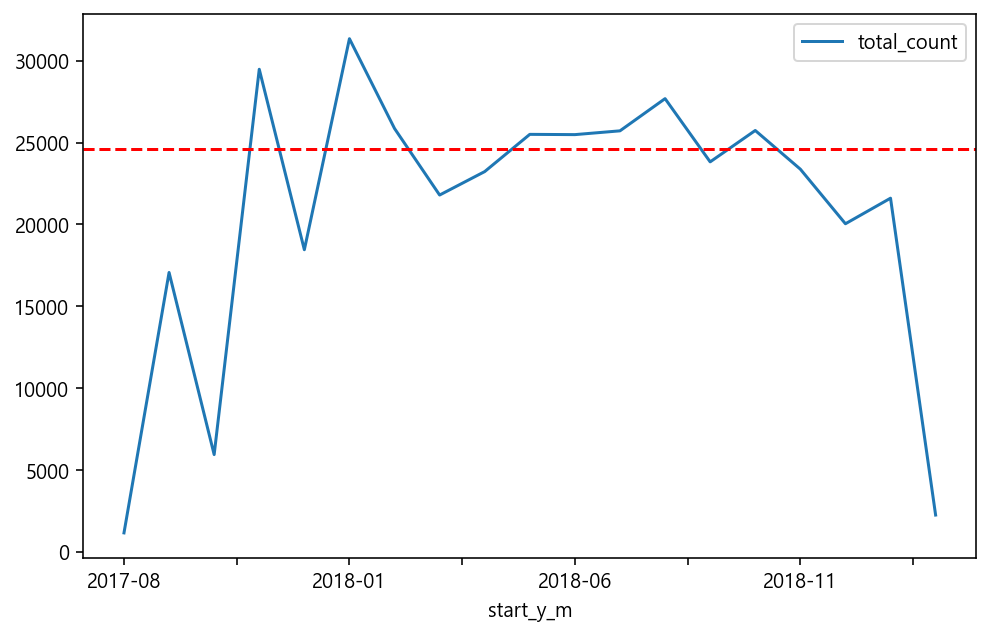

In [18]:
category_count_monthly_pivot_total.plot(figsize = (8,5))
plt.axhline(local_mean[0], c='red', ls='--')

### 분석 결과2
청원 글 수는 2017년 11월 급격히 증가한 이후 평균적으로 월별 24607개의 글이 등록되고 있다. 

# 5. 카테고리별 투표 수 시계열 그래프 그리기

In [19]:
df_copy = df[['start', 'end', 'category', 'votes']]
df_copy['mid_start_end'] = pd.Series([ (df_copy['start'][i] + (df_copy['end'][i] - df_copy['start'][i])/2) for i in range(df_copy.shape[0]) ])
df_copy['mid_start_end'] = pd.Series([ i.strftime('%Y-%m') for i in df_copy['mid_start_end'] ])
df_copy.head(2)

,start,end,category,votes,mid_start_end
0,2017-08-19,2017-11-17,안전/환경,9,2017-10
1,2017-08-19,2017-11-17,기타,17,2017-10


In [20]:
category_votes_monthly = pd.DataFrame(df_copy.groupby(['mid_start_end','category'])['votes'].sum()).reset_index('category')
category_votes_monthly.head(5)

,category,votes
mid_start_end,,
2017-08,경제민주화,2211
2017-08,교통/건축/국토,4806
2017-08,기타,52
2017-08,농산어촌,26
2017-08,문화/예술/체육/언론,445


In [21]:
category_votes_monthly_pivot =  category_votes_monthly.pivot(columns="category", values="votes").fillna(0)
category_votes_monthly_pivot.head(5)

category,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
mid_start_end,,,,,,,,,,,,,,,,,
2017-08,2211,4806,52,26,445,1,2,743,0,19,251,48948,10,4866,0,0,11348
2017-09,407,16271,9482,14,9661,1038,35,16559,49,13304,140833,57736,30757,9218,6063,33026,3504
2017-10,11827,29658,132814,850,42963,622159,1020,46022,4023,47549,148471,32054,801661,110474,26411,69734,11599
2017-11,6318,191519,156050,1366,87832,27803,38591,149318,225,269314,14245,35184,95121,7312,455,119888,35675
2017-12,26278,83847,412621,764,349161,12030,113900,742305,284200,72246,29634,473618,300230,49888,3215,94002,54411


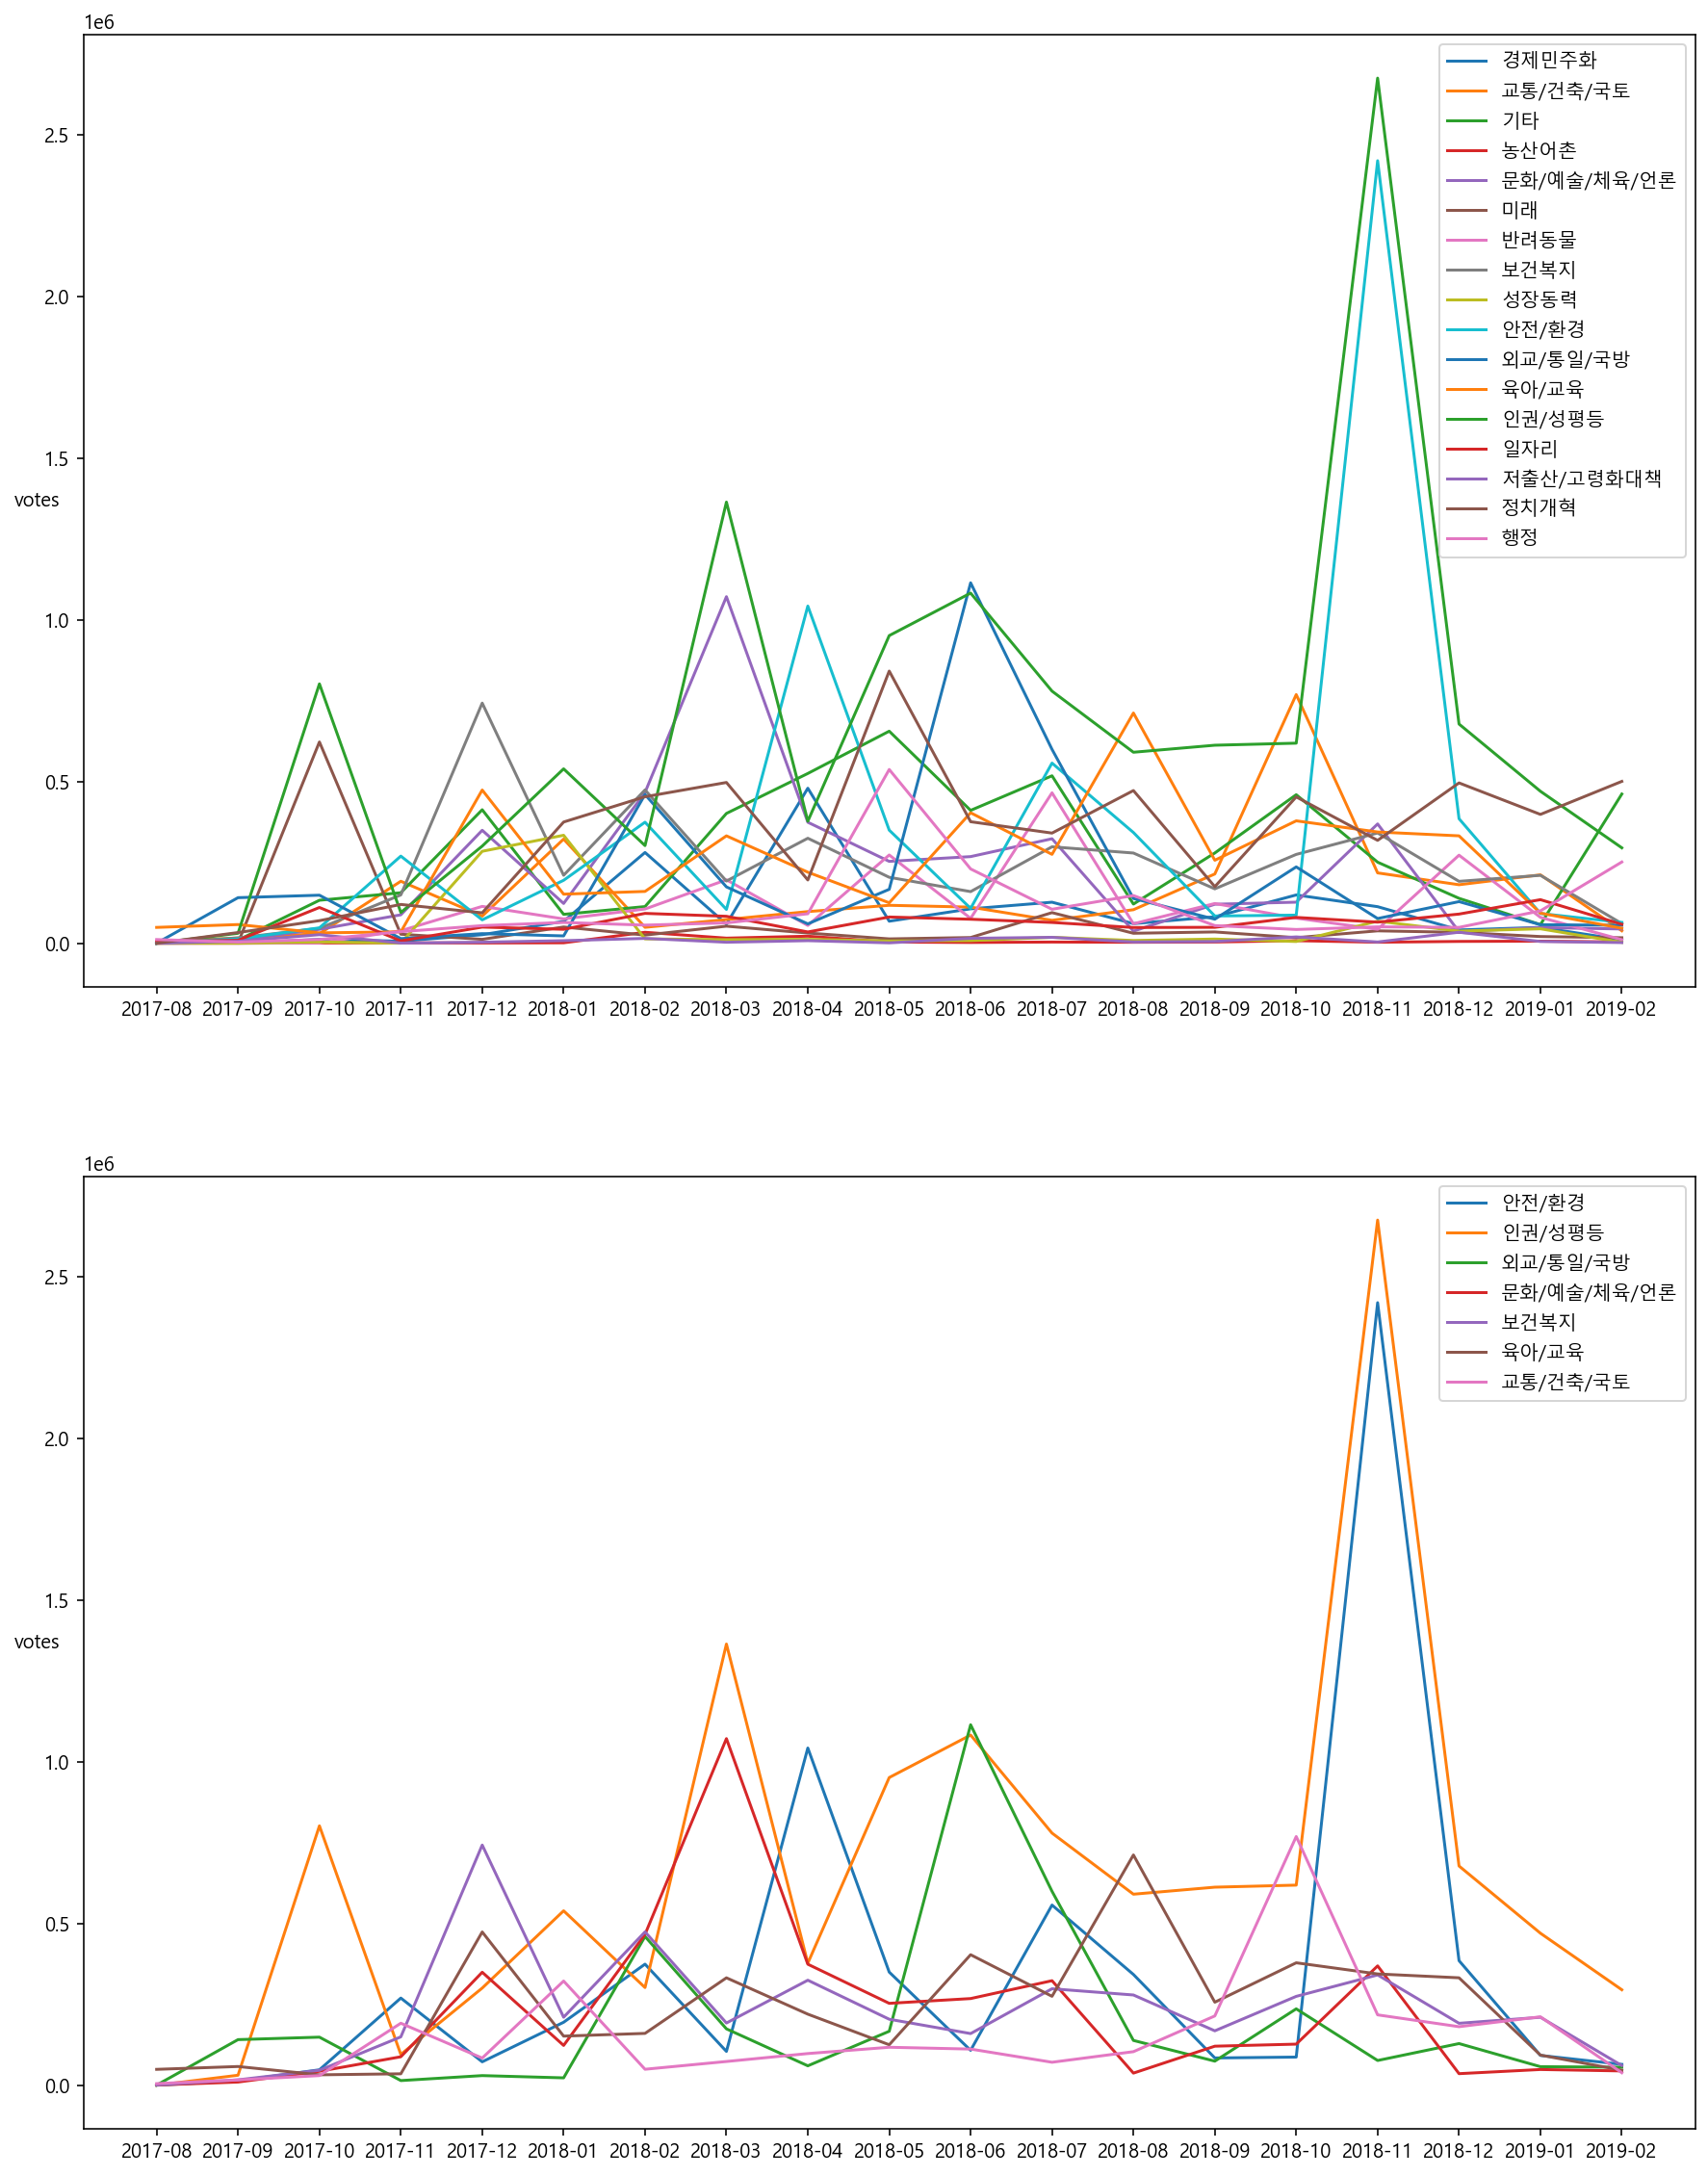

In [22]:
plt.rcParams["font.family"] = 'Malgun Gothic' # gulim

fig, axes = plt.subplots(nrows = 2, figsize = (15,20))

plt.sca(axes[0])
for category in category_votes_monthly_pivot.columns:
    plt.plot(category_votes_monthly_pivot.index, category_votes_monthly_pivot[category], label = category)   
plt.legend()
plt.ylabel('votes', rotation = 0)

plt.sca(axes[1])
category_list = ['안전/환경','인권/성평등','외교/통일/국방','문화/예술/체육/언론','보건복지','육아/교육','교통/건축/국토']
for category in category_list:
    plt.plot(category_votes_monthly_pivot.index, category_votes_monthly_pivot[category], label = category)   
plt.legend()
plt.ylabel('votes', rotation = 0)

plt.show()

### 분석 결과3
1. '안전/환경' 카테고리 글은 2018년 4월, 2018년 11월에 다른 카테고리 글에 비해 많은 투표를 받았다. 
2. '인권/성평등' 카테고리 글은 2017년 10월, 2018년 3월, 2018년 5월, 2018년 6월, 2018년 7월, 2018년 11월에 다른 카테고리 글에 비해 많은 투표를 받았다. 
3. '외교/통일/국방' 카테고리 글은 2018년 6월에 다른 카테고리 글에 비해 많은 투표를 받았다. 
4. '문화/예술/체육/언론' 카테고리 글은 2018년 3월에 다른 카테고리 글에 비해 많은 투표를 받았다. 
5. '보건복지' 카테고리 글은 2017년 12월에 다른 카테고리 글에 비해 많은 투표를 받았다. 
6. '육아/교육' 카테고리 글은 2018년 8월에 다른 카테고리 글에 비해 많은 투표를 받았다. 
7. '교통/건축/국토' 카테고리 글은 2018년 10월에 다른 카테고리 글에 비해 많은 투표를 받았다. 

# 6. 투표 수 시계열 그래프 그리기

In [23]:
category_votes_monthly_pivot_total = pd.DataFrame(category_votes_monthly_pivot.apply(sum, axis = 1))
category_votes_monthly_pivot_total.columns = ['total_votes']
category_votes_monthly_pivot_total.head(5)

,total_votes
mid_start_end,
2017-08,73728
2017-09,347957
2017-10,2139289
2017-11,1236216
2017-12,3102350


In [24]:
total_mean = category_votes_monthly_pivot_total.mean().round(1)
total_mean

total_votes    3125213.1
dtype: float64

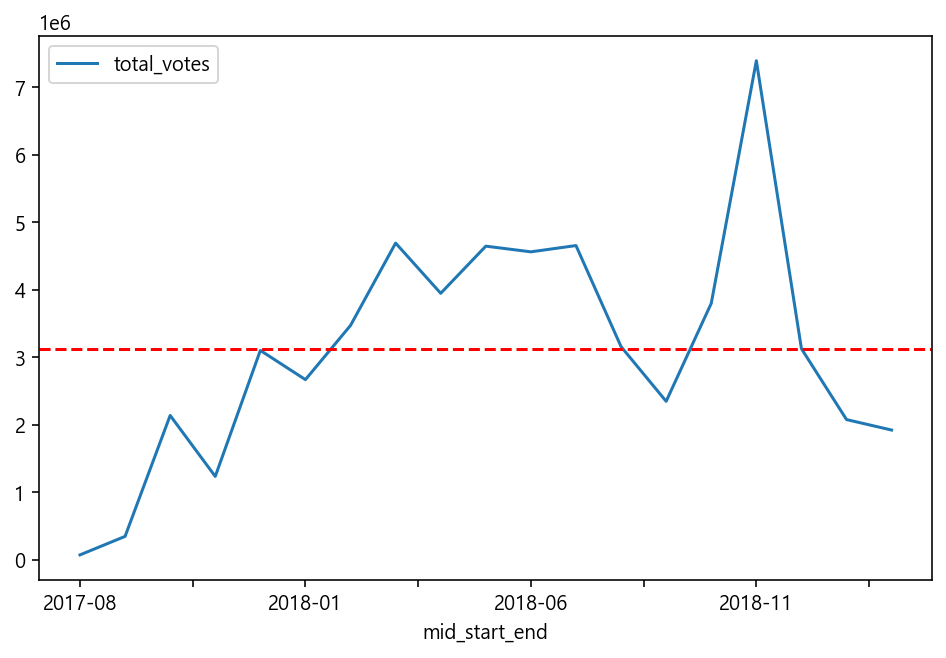

In [25]:
category_votes_monthly_pivot_total.plot(figsize = (8,5))
plt.axhline(total_mean[0], c='red', ls='--')

### 분석 결과4
투표수는 2018년 7월까지 전반적으로 증가하는 추세를 보인다. 그 이후 2018년 11월에 투표수가 급격히 증가한 것을 제외하고 감소하는 추세를 보인다. 

# 7. 답변 대상 청원 중 답변 받지 못한 청원 수 그래프 그리기

In [27]:
df_copy = df[['end', 'category', 'answered', 'votes']]
df_copy['answer'] = (df_copy['votes'] > 200000) == 1
df_copy['answer'] = df_copy['answer'].astype('int')
df_copy['answer_diff'] = df_copy['answer'] - df_copy['answered']
df_copy['end_y_m'] = pd.Series([ i.strftime('%Y-%m') for i in df_copy['end'] ])
df_copy.head(2)

,end,category,answered,votes,answer,answer_diff,end_y_m
0,2017-11-17,안전/환경,0,9,0,0,2017-11
1,2017-11-17,기타,0,17,0,0,2017-11


In [28]:
not_answered_monthly = df_copy.groupby(['end_y_m'])['answer_diff'].sum()
not_answered_monthly = not_answered_monthly.reset_index()
not_answered_monthly.tail(5)

,end_y_m,answer_diff
15,2018-11,12
16,2018-12,6
17,2019-01,3
18,2019-02,3
19,2019-03,1


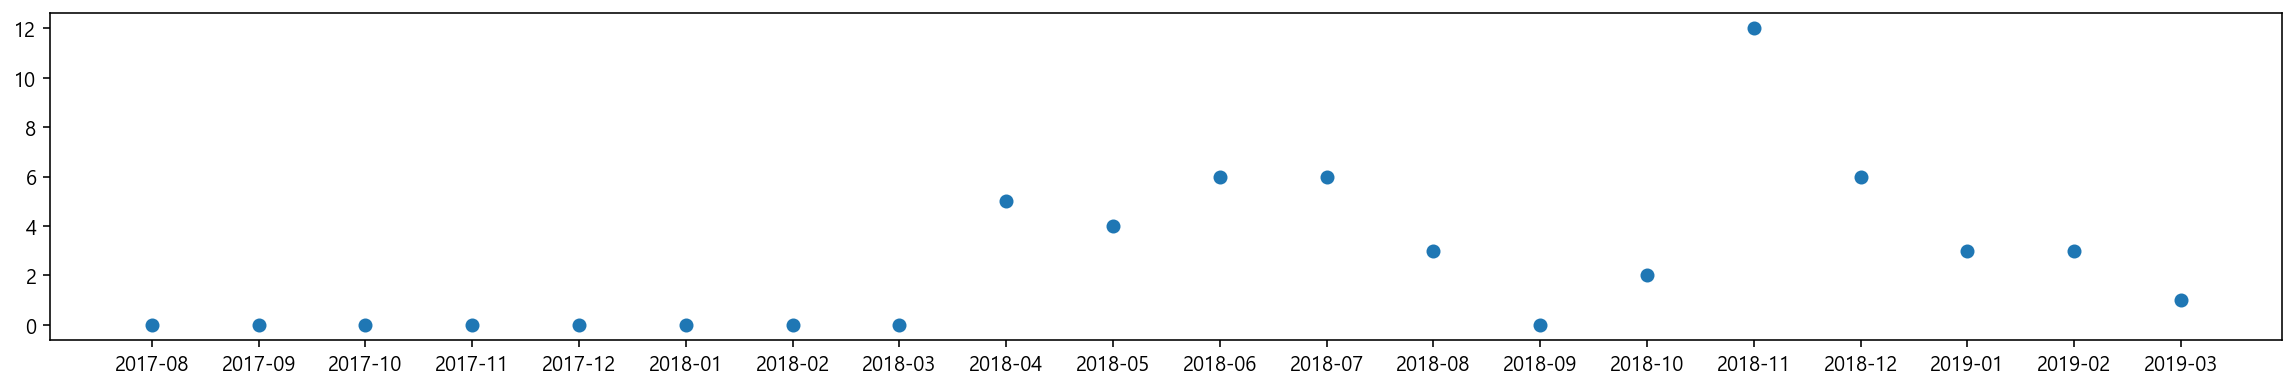

In [29]:
scatter_plot = plt.figure(figsize = (20,3))

axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(x = 'end_y_m', y = 'answer_diff', data = not_answered_monthly)

### 분석 결과5
2018년 11월에 답변되지 않은 청원 수가 가장 많고 2018년 4월부터 2018년 8월까지 전반적으로 답변되지 않은 청원 수가 많다.

In [30]:
not_answered_category = df_copy.groupby(['category'])['answer_diff'].sum()
not_answered_category = not_answered_category.reset_index()
not_answered_category.index = not_answered_category['category']
not_answered_category.drop('category', axis = 1, inplace = True)
not_answered_category.head(5)

,answer_diff
category,
경제민주화,1
교통/건축/국토,1
기타,7
농산어촌,0
문화/예술/체육/언론,3


<AxesSubplot:xlabel='category'>

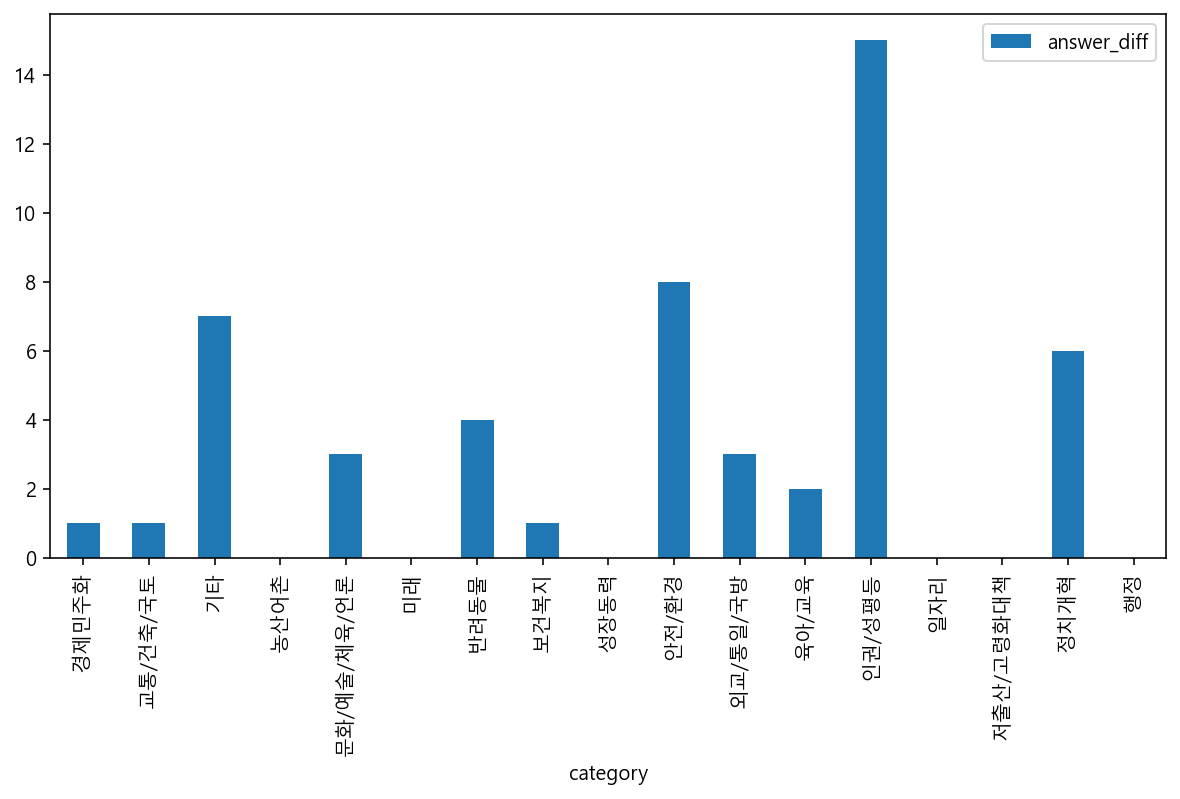

In [31]:
not_answered_category.plot.bar(figsize = (10,5))

### 분석 결과6
'인권/성평등', '안전/환경', '정치개혁' 카테고리 부분에서 답변되지 않은 청원 수가 많다. 